# Importing the required modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reading the dataset

## Train dataset

In [3]:
X_train = pd.read_csv(r"C:\Users\mitug\Machine-Learning-Lab\Lab-9_K_Means\go_ny\train.csv")

## Test dataset

In [4]:
X_test = pd.read_csv(r"C:\Users\mitug\Machine-Learning-Lab\Lab-9_K_Means\go_ny\test.csv")

## Validation dataset

In [5]:
X_val = pd.read_csv(r"C:\Users\mitug\Machine-Learning-Lab\Lab-9_K_Means\go_ny\validation.csv")

# Training the K-Means Clustering model

In [6]:
kmeans = KMeans()
kmeans.fit(X_train)
kmeans.predict(X_test)

C:\Users\mitug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 29
Feature names seen at fit time, yet now missing:
- 0

  warnings.warn(message, FutureWarning)


array([7, 3, 0, ..., 5, 2, 2])

# Hyperparameter tuning for the number of clusters

## Using the elbow method

Here, we calculate the WCSS (Within-Cluster Sum of Squares). It is the sum of squared distance between each point and the centroid in a cluster. A lineplot is made from obtain values of WCSS.

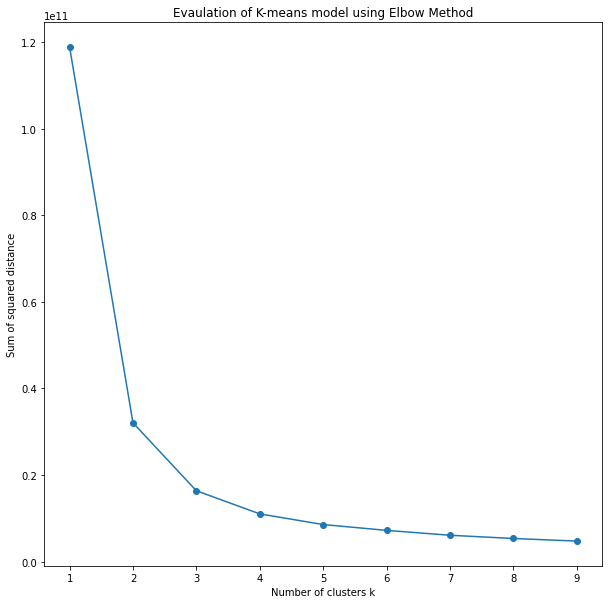

In [7]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    sse.append(km.inertia_)

plt.figure(figsize=(10, 10))
plt.plot(list_k, sse, '-o')
plt.xlabel("Number of clusters k")
plt.ylabel("Sum of squared distance")
plt.title("Evaulation of K-means model using Elbow Method")
plt.show()

## Inferences :

- The main idea behind plotting graph is to check for which value of K, is the WCSS minimum.
- Here, from the graph we can infer that 3 clusters are the optimal number of clusters for the given dataset.
- As the value of n is very less compared to number of entries in the dataset, the WCSS is be high.
- As the value of n is very close to the number of entries in the dataset, the WCSS is ought to be low.
- Hence, initially the value is very high and then it drops further and then drops even further and becomes parallel to the x-axis.

# Final Model

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

C:\Users\mitug\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 29
Feature names seen at fit time, yet now missing:
- 0

  warnings.warn(message, FutureWarning)


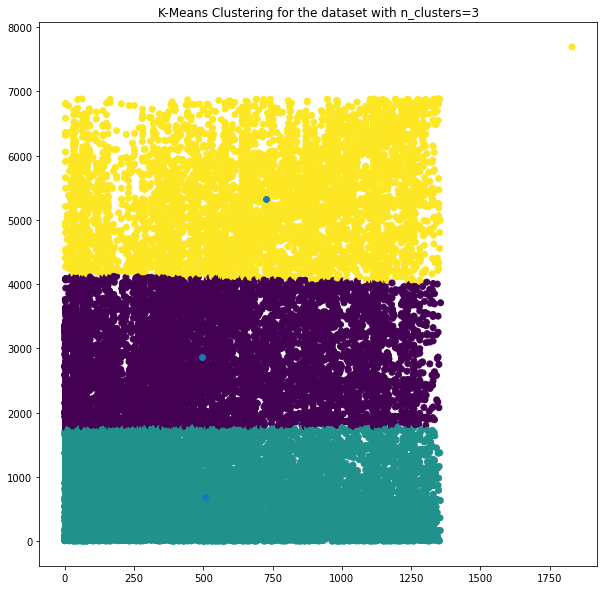

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=kmeans.predict(X_train))
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1])
plt.title("K-Means Clustering for the dataset with n_clusters=3")
plt.show()

# Inference:
- We can observe that there are 3 clusters.
- However, we can also understand that this algorithm is sensitive to outliers. As we can see one outlier in the yellow cluster pushes the centroid further. Similiarly for the blue cluster with 2 outliers.